In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import sklearn
import scipy
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib
from sklearn.linear_model import Lasso,Ridge

In [2]:
data=pd.read_csv('winequality.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df=pd.DataFrame(data=data)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

fixed acidity              AxesSubplot(0.125,0.536818;0.0945122x0.343182)
volatile acidity        AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
citric acid             AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
residual sugar          AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
chlorides               AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
free sulfur dioxide     AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
total sulfur dioxide    AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
density                       AxesSubplot(0.125,0.125;0.0945122x0.343182)
pH                         AxesSubplot(0.238415,0.125;0.0945122x0.343182)
sulphates                  AxesSubplot(0.351829,0.125;0.0945122x0.343182)
alcohol                    AxesSubplot(0.465244,0.125;0.0945122x0.343182)
quality                    AxesSubplot(0.578659,0.125;0.0945122x0.343182)
dtype: object

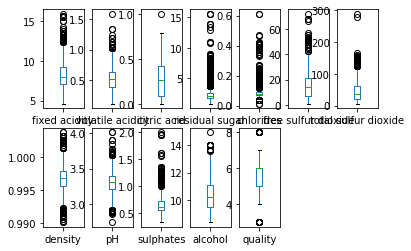

In [8]:
df.plot(kind='box',subplots=True,layout=(2,7))

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

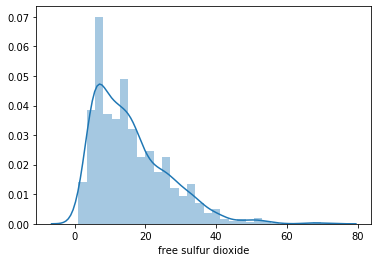

In [10]:
sns.distplot(df['free sulfur dioxide'])

In [11]:
z=np.abs(zscore(df))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [12]:
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [13]:
threshold=3
dfn=df[(z<3).all(axis=1)]

In [14]:
dfn.shape

(1451, 12)

fixed acidity              AxesSubplot(0.125,0.536818;0.0945122x0.343182)
volatile acidity        AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
citric acid             AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
residual sugar          AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
chlorides               AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
free sulfur dioxide     AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
total sulfur dioxide    AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
density                       AxesSubplot(0.125,0.125;0.0945122x0.343182)
pH                         AxesSubplot(0.238415,0.125;0.0945122x0.343182)
sulphates                  AxesSubplot(0.351829,0.125;0.0945122x0.343182)
alcohol                    AxesSubplot(0.465244,0.125;0.0945122x0.343182)
quality                    AxesSubplot(0.578659,0.125;0.0945122x0.343182)
dtype: object

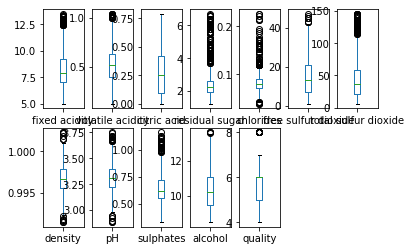

In [15]:
dfn.plot(kind='box',subplots=True,layout=(2,7))

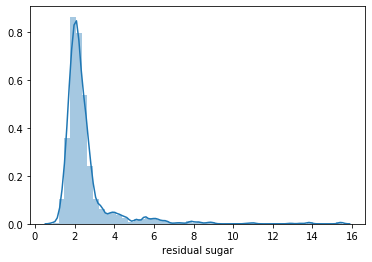

In [16]:
sns.distplot(df['residual sugar'])

In [17]:
dfn.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
x=df.iloc[:,0:-1]
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [19]:
y=df.iloc[:,-1]

In [20]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [21]:
lm=LinearRegression(normalize='True')

In [22]:
scale=StandardScaler()

In [23]:
x=scale.fit_transform(x)

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=45)

In [25]:
x_train.shape

(1247, 11)

In [26]:
y_train.shape

(1247,)

In [27]:
x_test.shape

(352, 11)

In [28]:
y_test.shape

(352,)

In [29]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize='True')

In [30]:
lm.score(x_train,y_train)

0.3566530607950682

In [31]:
ls=Lasso(alpha=0.01)
ls.fit(x_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [32]:
ls.score(x_train,y_train)

0.3539112811198908

In [33]:
el=ElasticNet()

In [34]:
el.fit(x_train,y_train) 

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
el.score(x_train,y_train) 

0.0

In [36]:
s=cross_val_score(lm,x,y,cv=5)

In [37]:
print(s)

[0.13200871 0.31858135 0.34955348 0.369145   0.2809196 ]


In [42]:
rf=RandomForestClassifier(n_estimators=100,random_state=55)

In [43]:
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(rf.score(x_train,y_train))

1.0


In [44]:
pred

array([6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5,
       5, 6, 5, 5, 6, 7, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 7, 5, 6,
       5, 6, 5, 6, 6, 6, 6, 6, 5, 7, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6,
       7, 6, 5, 5, 5, 7, 7, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6,
       6, 7, 5, 6, 6, 5, 5, 6, 6, 5, 7, 7, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6,
       5, 6, 5, 8, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 7,
       5, 6, 5, 6, 5, 7, 6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 5, 7, 5,
       6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 5, 5, 6, 7, 6, 6, 6, 6, 5, 5, 5,
       7, 5, 7, 6, 5, 5, 7, 5, 6, 7, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6,
       6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 7, 7, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6,
       7, 7, 5, 5, 6, 5, 6, 7, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5,
       7, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 7, 6, 7, 5, 5, 6, 6,
       5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 7, 5, 7, 5, 7, 6,
       5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 7, 5, 5, 6,

In [45]:
from sklearn.externals import joblib

In [46]:
joblib.dump(rf,'rfwinefile.obj')

['rfwinefile.obj']